### Using Logistic Regression to train the pumpkin Dataset
using only [color, origin, item size, variety, city name, package]

In [24]:
#make necssary imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder



In [33]:
#import the pumpkin dataset

pumpkin = pd.read_csv('US-pumpkins.csv')

selected_columns = ['City Name', 'Package', 'Item Size', 'Variety', 'Color', 'Origin']
new_pumpkin = pumpkin.drop([c for c in pumpkin.columns if c not in selected_columns], axis= 1)
new_pumpkin.dropna(inplace = True)

new_pumpkin.head()
new_pumpkin.info()

<class 'pandas.core.frame.DataFrame'>
Index: 991 entries, 2 to 1698
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   City Name  991 non-null    object
 1   Package    991 non-null    object
 2   Variety    991 non-null    object
 3   Origin     991 non-null    object
 4   Item Size  991 non-null    object
 5   Color      991 non-null    object
dtypes: object(6)
memory usage: 54.2+ KB


In [34]:
new_pumpkin = new_pumpkin.apply(LabelEncoder().fit_transform)

c:\Users\Amina\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 63.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Amina\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 21.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Amina\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 79.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Amina\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 35.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(ms

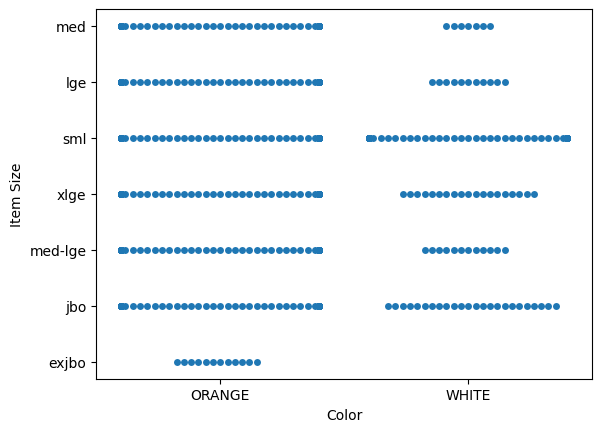

In [26]:
sns.swarmplot(data=new_pumpkin, x='Color', y='Item Size')
plt.show()

In [40]:
#lets train the logistic model
selected_features = ['City Name', 'Variety', 'Item Size', 'Origin', 'Package']
X = new_pumpkin[selected_features]
y = new_pumpkin['Color']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

evaluation = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(evaluation)
print(f'Accuracy: {accuracy}')

              precision    recall  f1-score   support

           0       0.79      0.99      0.88       157
           1       0.00      0.00      0.00        42

    accuracy                           0.78       199
   macro avg       0.39      0.50      0.44       199
weighted avg       0.62      0.78      0.69       199

Accuracy: 0.7839195979899497


In [43]:
# confusion matrix
print(confusion_matrix(y_test, y_pred))

[[156   1]
 [ 42   0]]


C:\Users\Amina\AppData\Local\Temp\ipykernel_16648\2966622117.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


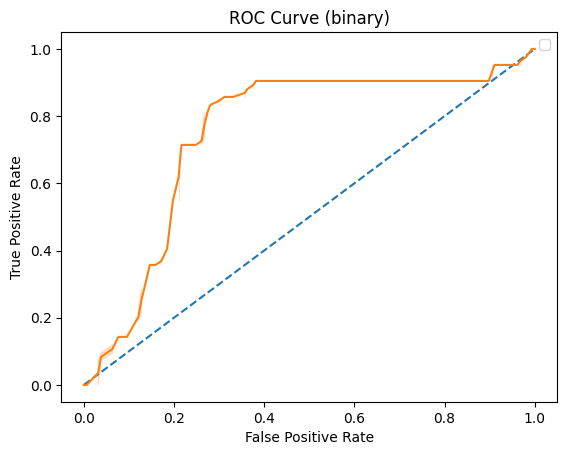

In [59]:
#plotting the roc curve of the model
from sklearn.metrics import  roc_curve, roc_auc_score
y_scores = log_reg.predict_proba(X_test)

fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
sns.lineplot(x=[0, 1], y=[0, 1], linestyle='--')
sns.lineplot(x=fpr, y=tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (binary)')
plt.legend()
plt.show()

In [61]:
auc = roc_auc_score(y_test, y_scores [:, 1])
print(f'AUC: {auc}')    #area under the curve

AUC: 0.7496208674552622


#### Conclusion:
AUC is 0.75 which is pretty good. The model has a good performance with accuracy of 78%. 